In [1]:
import pandas as pd
df = pd.read_csv('titanic-passengers.csv',sep=';', encoding = "UTF-8")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [3]:
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
s = len(df['Name'])
print(s)
df.isnull().sum()*100/s

891


PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [5]:
df.drop(columns = ['Cabin'], inplace = True)
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [6]:
df['Age'].fillna(df['Age'].mean(), inplace = True)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [7]:
df['Embarked'].value_counts()


S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [8]:
df['Embarked'].fillna("S", inplace = True)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

[Text(0, 0, 'Male'), Text(1, 0, 'Female')]

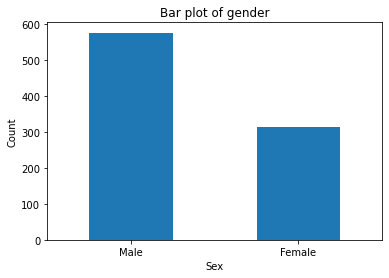

In [9]:
import matplotlib.pyplot as plt
plt.xlabel("Sex")
plt.ylabel("Count")
plt.title("Bar plot of gender")
vc = df['Sex'].value_counts()
a = vc.plot.bar(rot = 0)
a.set_xticklabels(["Male", "Female"])

<AxesSubplot:title={'center':'Histogram of different ages'}, xlabel='Age', ylabel='Frequency'>

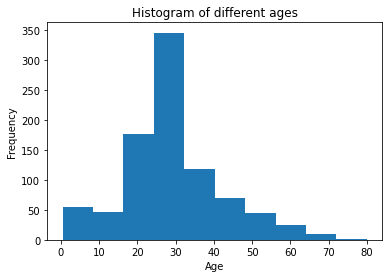

In [10]:
plt.xlabel("Age")
plt.title("Histogram of different ages")
df['Age'].plot.hist()

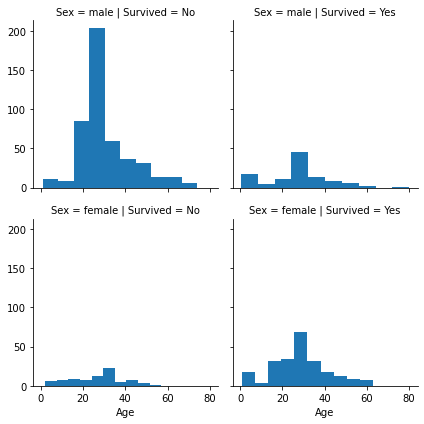

In [11]:
import seaborn as sns
Age_S = sns.FacetGrid(df,row = 'Sex',col = 'Survived')
Age_S.map(plt.hist, 'Age')


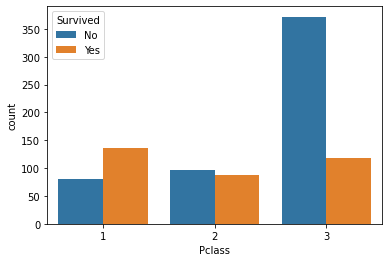

In [12]:
sns.countplot(x = 'Pclass', hue ='Survived', data = df)
plt.show()

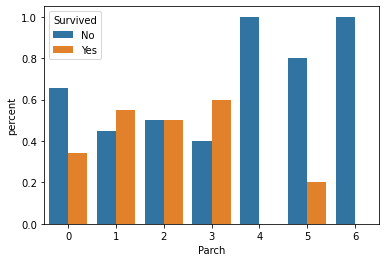

In [13]:
pct2 = (df.groupby(['Parch','Survived']).size() / df.groupby(['Parch']).size()).reset_index().rename({0:'percent'}, axis=1)
sns.barplot(x='Parch', hue='Survived', y='percent', data=pct2)
plt.show()

In [14]:
labels_Surv_Sex = {"Survived" : {"Yes" : 1, "No" : 0}, "Sex" :{"male" : 0, "female" : 1}}
df.replace(labels_Surv_Sex, inplace = True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",0,28.0,0,0,248740,13.0000,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",0,25.0,0,0,348123,7.6500,S
2,641,0,3,"Jensen, Mr. Hans Peder",0,20.0,0,0,350050,7.8542,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",1,29.0,0,4,349909,21.0750,S
4,672,0,1,"Davidson, Mr. Thornton",0,31.0,1,0,F.C. 12750,52.0000,S


In [15]:
one_hot = pd.get_dummies(df['Embarked'])
df = df.drop('Embarked', axis = 1)
df = df.join(one_hot)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,C,Q,S
0,343,0,2,"Collander, Mr. Erik Gustaf",0,28.0,0,0,248740,13.0000,0,0,1
1,76,0,3,"Moen, Mr. Sigurd Hansen",0,25.0,0,0,348123,7.6500,0,0,1
2,641,0,3,"Jensen, Mr. Hans Peder",0,20.0,0,0,350050,7.8542,0,0,1
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",1,29.0,0,4,349909,21.0750,0,0,1
4,672,0,1,"Davidson, Mr. Thornton",0,31.0,1,0,F.C. 12750,52.0000,0,0,1


In [16]:
df.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.033207,-0.057527,-0.001652,0.012658,-0.001205,-0.033606,0.022204
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.069809,-0.035322,0.081629,0.257307,0.168240,0.003650,-0.149683
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.331339,0.083081,0.018443,-0.549500,-0.243292,0.221009,0.074053
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.084153,0.114631,0.245489,0.182333,0.082853,0.074115,-0.119224
Age,0.033207,-0.069809,-0.331339,-0.084153,1.000000,-0.232625,-0.179191,0.091566,0.032024,-0.013855,-0.019336
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.232625,1.000000,0.414838,0.159651,-0.059528,-0.026354,0.068734
Parch,-0.001652,0.081629,0.018443,0.245489,-0.179191,0.414838,1.000000,0.216225,-0.011069,-0.081228,0.060814
Fare,0.012658,0.257307,-0.549500,0.182333,0.091566,0.159651,0.216225,1.000000,0.269335,-0.117216,-0.162184
C,-0.001205,0.168240,-0.243292,0.082853,0.032024,-0.059528,-0.011069,0.269335,1.000000,-0.148258,-0.782742
Q,-0.033606,0.003650,0.221009,0.074115,-0.013855,-0.026354,-0.081228,-0.117216,-0.148258,1.000000,-0.499421


In [17]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

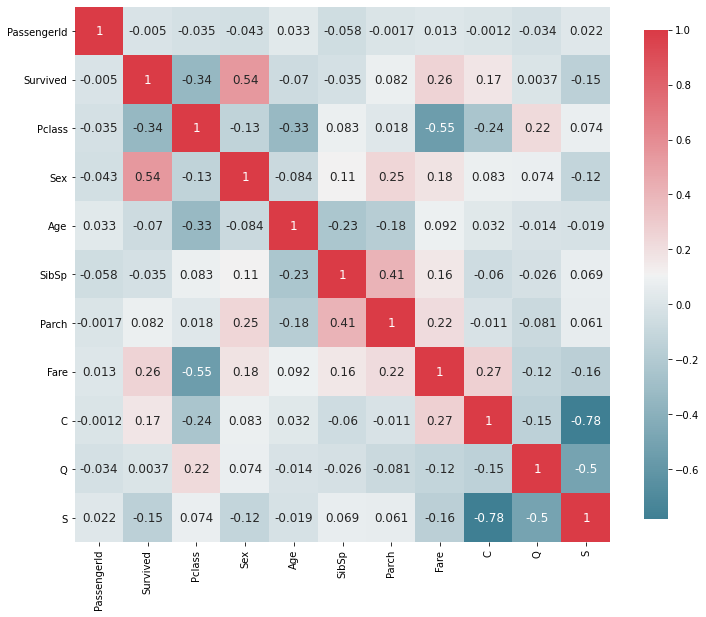

In [18]:
plot_correlation_map( df )

In [19]:
#The correlation map gives visual and numerical insights about the linear correlation between the differents variables of the dataset.
#As we can see, Sex and Age are the most postively correlated to the chances of surviving while the Pclass seems to be negatively correlated
#This map is to use with caution because it onlye reflects the linear correlation between the variables and it doensn't study the other ones.
# 

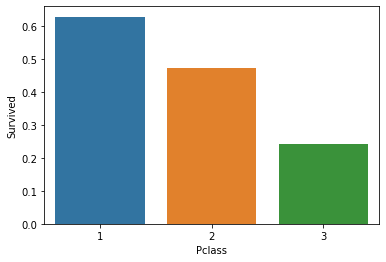

In [20]:
pct3 = df[['Pclass','Survived']].groupby(['Pclass'], as_index=True).mean()
pct3['Pclass'] = pct3.index
sns.barplot(x = 'Pclass', y ='Survived', data = pct3)
plt.show()

In [21]:
titles = []
for i in df['Name']:
    x = i.split(',')
    x = x[1].split('.')[0]
    titles.append(x)
df['Title'] = titles
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,C,Q,S,Title
0,343,0,2,"Collander, Mr. Erik Gustaf",0,28.0,0,0,248740,13.0000,0,0,1,Mr
1,76,0,3,"Moen, Mr. Sigurd Hansen",0,25.0,0,0,348123,7.6500,0,0,1,Mr
2,641,0,3,"Jensen, Mr. Hans Peder",0,20.0,0,0,350050,7.8542,0,0,1,Mr
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",1,29.0,0,4,349909,21.0750,0,0,1,Mrs
4,672,0,1,"Davidson, Mr. Thornton",0,31.0,1,0,F.C. 12750,52.0000,0,0,1,Mr


In [22]:
df.drop(columns = ['Fare','Name','Ticket'], inplace = True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,C,Q,S,Title
0,343,0,2,0,28.0,0,0,0,0,1,Mr
1,76,0,3,0,25.0,0,0,0,0,1,Mr
2,641,0,3,0,20.0,0,0,0,0,1,Mr
3,568,0,3,1,29.0,0,4,0,0,1,Mrs
4,672,0,1,0,31.0,1,0,0,0,1,Mr


In [23]:
FamilySize = df['SibSp'] + df['Parch']
df['FamilySize'] = FamilySize
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,C,Q,S,Title,FamilySize
0,343,0,2,0,28.0,0,0,0,0,1,Mr,0
1,76,0,3,0,25.0,0,0,0,0,1,Mr,0
2,641,0,3,0,20.0,0,0,0,0,1,Mr,0
3,568,0,3,1,29.0,0,4,0,0,1,Mrs,4
4,672,0,1,0,31.0,1,0,0,0,1,Mr,1


In [24]:
labels_title = {"Title" :{

                    "Capt":       "Officer",

                    "Col":        "Officer",

                    "Major":      "Officer",

                      "Dr":         "Officer",

                    "Rev":        "Officer",

                    "Jonkheer":   "Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty",

                  "the Countess": "Royalty",

                    "Dona":       "Royalty",

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss" :      "Miss",

                    "Ms":         "Mrs",

                    "Mr" :        "Mrs",

                    "Mrs" :       "Mrs",

                    "Master" :    "Master"

                    }}
df.replace(labels_title, inplace = True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,C,Q,S,Title,FamilySize
0,343,0,2,0,28.0,0,0,0,0,1,Mr,0
1,76,0,3,0,25.0,0,0,0,0,1,Mr,0
2,641,0,3,0,20.0,0,0,0,0,1,Mr,0
3,568,0,3,1,29.0,0,4,0,0,1,Mrs,4
4,672,0,1,0,31.0,1,0,0,0,1,Mr,1


In [25]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Title']=encoder.fit_transform(df['Title'])
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,C,Q,S,Title,FamilySize
0,343,0,2,0,28.0,0,0,0,0,1,11,0
1,76,0,3,0,25.0,0,0,0,0,1,11,0
2,641,0,3,0,20.0,0,0,0,0,1,11,0
3,568,0,3,1,29.0,0,4,0,0,1,12,4
4,672,0,1,0,31.0,1,0,0,0,1,11,1


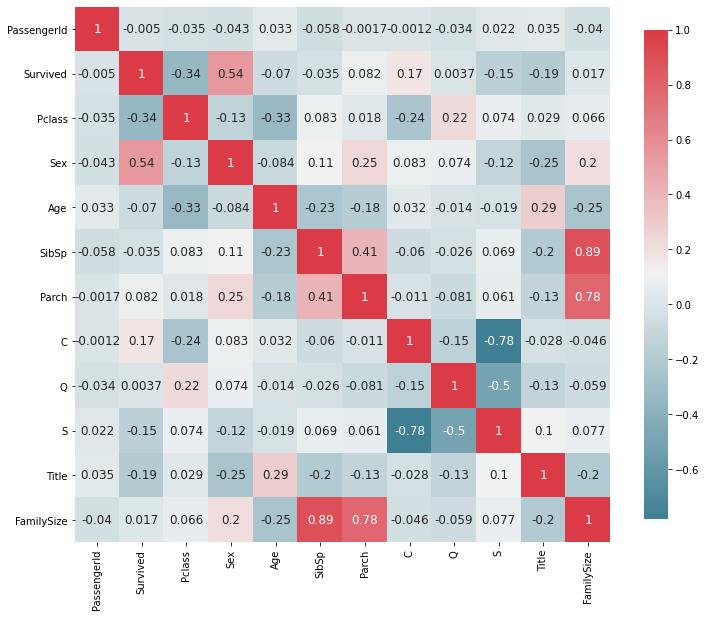

In [26]:
plot_correlation_map( df )

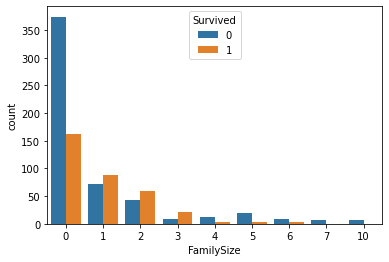

In [27]:
sns.countplot(x = 'FamilySize', hue ='Survived', data = df)
plt.show()


# Decision Tree Classifier

In [28]:
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

x=df.drop(["S", "Q", "C", "Title", "Survived"], axis=1)
y= df["Survived"]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)


treep = tree.DecisionTreeClassifier()  
treep.fit(x_train, y_train)  
y_pred=treep.predict(x_test)   
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.7262569832402235


In [29]:
x_features = ["PassengerId", "Pclass", "Sex", "Age", "SibSp", "Parch", "FamilySize"]

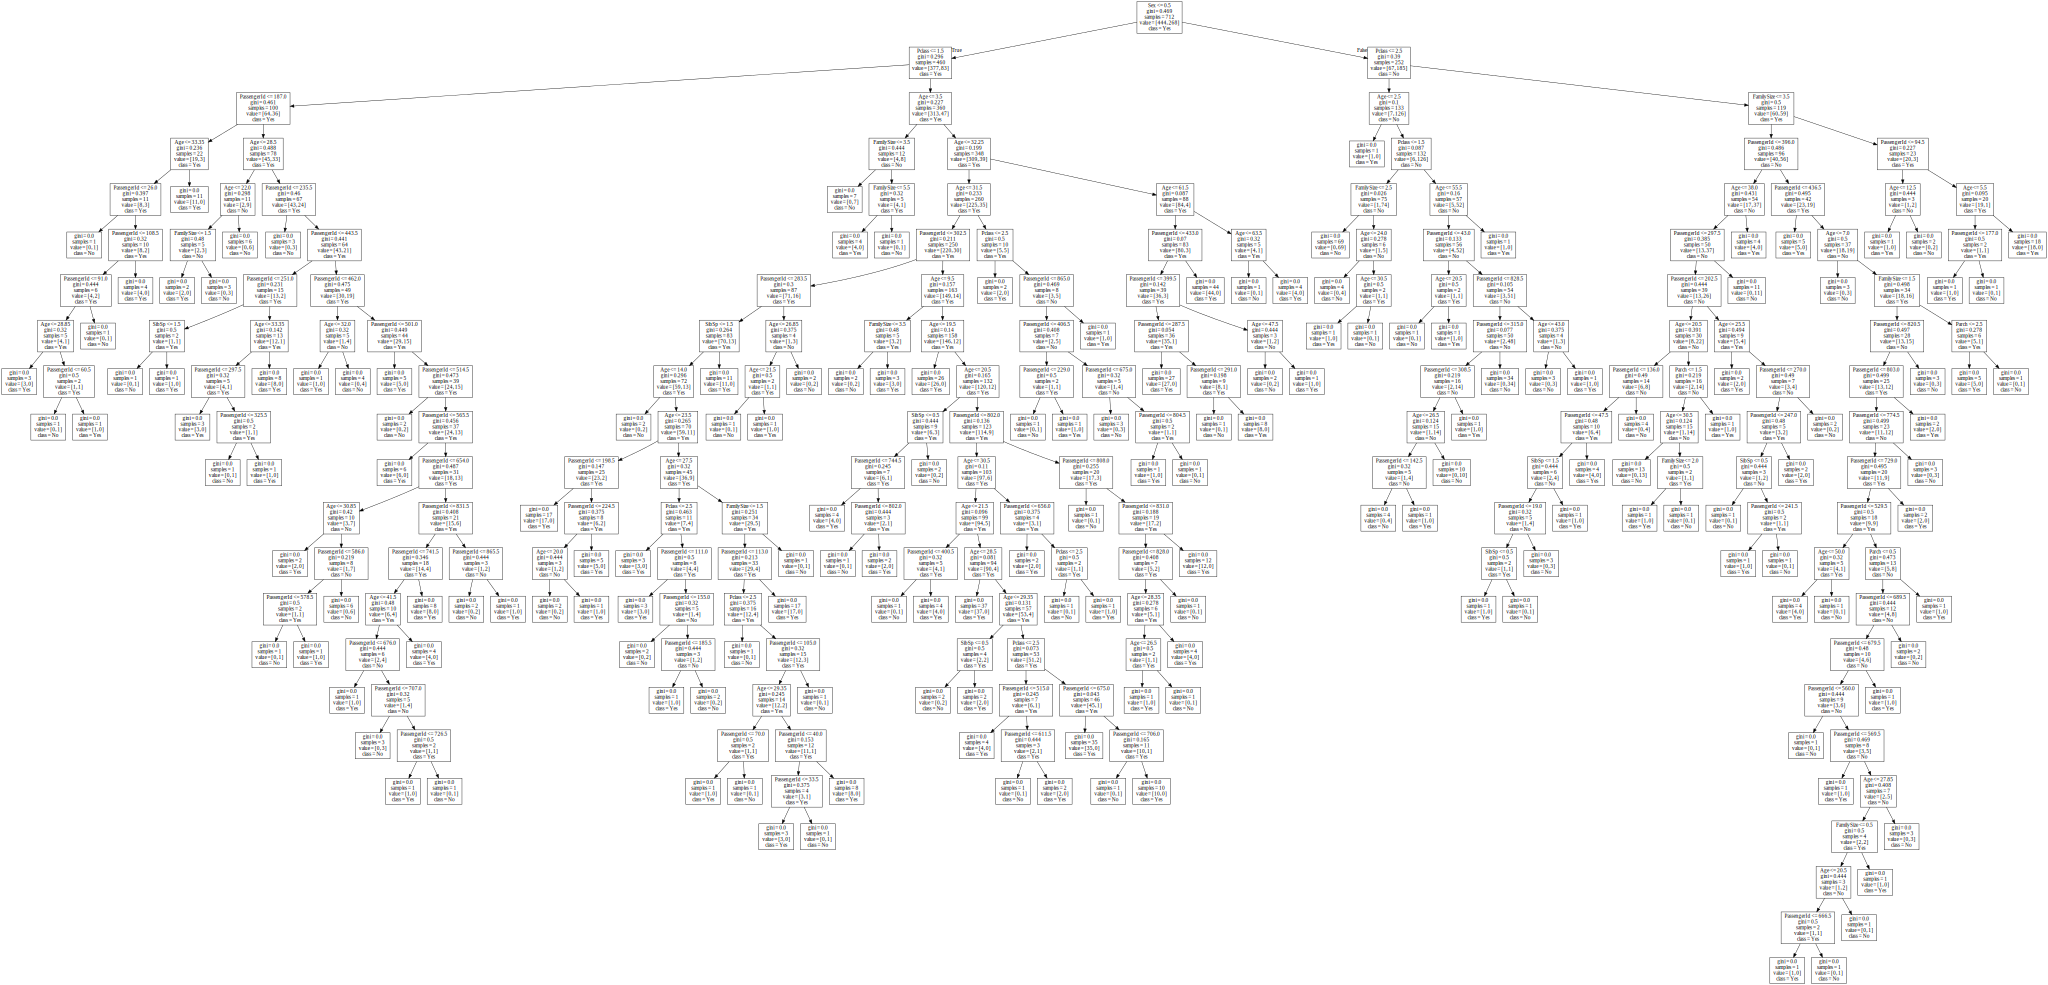

In [30]:
import graphviz
from sklearn.tree import export_graphviz

dot_data = tree.export_graphviz(treep, out_file=None, feature_names = x_features, class_names = ["Yes", "No"])


graph = graphviz.Source(dot_data, format="png") 
graph.render("df")
graph

In [31]:

x=df.drop(["Survived", "Title"], axis=1)
y= df["Survived"]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)


treep = tree.DecisionTreeClassifier()  
treep.fit(x_train, y_train)  
y_pred=treep.predict(x_test)   
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.7374301675977654


# The accuracy score is less than the one above when we take into account the Embarked column

In [32]:
x=df.drop(["Survived", "Title", "C", "Q", "S"], axis=1)
y= df["Survived"]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)


treep = tree.DecisionTreeClassifier(criterion = "gini", splitter = 'random', max_leaf_nodes = 10, min_samples_leaf = 5, max_depth = 5)  
treep.fit(x_train, y_train)  
y_pred=treep.predict(x_test)   
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.8044692737430168


# Accuracy increases after pruning

# Let's try Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier
x=df.drop(["Survived", "Title", "C", "Q", "S"], axis=1)
y= df["Survived"]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)

clf=RandomForestClassifier(n_estimators=10)  
clf.fit(x_train, y_train)  
y_pred=clf.predict(x_test)
init = accuracy_score(y_test, y_pred)
print("Accuracy:", init)  

Accuracy: 0.8212290502793296


In [34]:
clf=RandomForestClassifier(n_estimators=100)  
clf.fit(x_train, y_train)  
y_pred=clf.predict(x_test)  
print("Accuracy:", accuracy_score(y_test, y_pred))  

Accuracy: 0.8324022346368715


In [35]:
clf=RandomForestClassifier(n_estimators=500)  
clf.fit(x_train, y_train)  
y_pred=clf.predict(x_test)  
print("Accuracy:", accuracy_score(y_test, y_pred))  

Accuracy: 0.8379888268156425


# When we increase the number of estimators from 10 to 100, we can see an increase in the accuracy. However, from 100 to 1000, there is not a big difference and the accuracy may drop a bit. Let's try to find the most efficient number of estimators

In [36]:
best = 10

for i in range(10,100):
    clf=RandomForestClassifier(n_estimators=i)  
    clf.fit(x_train, y_train)  
    y_pred=clf.predict(x_test)
    if (accuracy_score(y_test, y_pred) > init):
        init = accuracy_score(y_test, y_pred)
        best = i
print (best)
clf=RandomForestClassifier(n_estimators=best)  
clf.fit(x_train, y_train)  
y_pred=clf.predict(x_test)  
print("Accuracy:", accuracy_score(y_test, y_pred))  
    

46
Accuracy: 0.8491620111731844
